# Page View Time Series Visualizer

For this project i will visualize time series data using a line chart, bar chart, and box plots. i will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing **the number of page views each day** on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help understand the patterns in visits and identify yearly and monthly growth.

In [2]:
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
register_matplotlib_converters()
import numpy as np
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=True, index_col='date')

## Data description

the data present in the data set is constructed as follow :

|date    |value   |
|:-------|:-------|
|date type    | int    |

# Data cleaning
i will Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [3]:
a = df.sort_values(by = "value").copy()

In [4]:
blim = (a.head(round(len(a)*0.025))).iloc[-1].value
blim

17628

In [5]:
tlim = (a.tail(round(len(a)*0.025))).iloc[0].value
tlim

177647

In [6]:
df = df.drop(df[df.value >= tlim].index)
df = df.drop(df[df.value <= blim].index)

## Line plot

I will create a line plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

[]

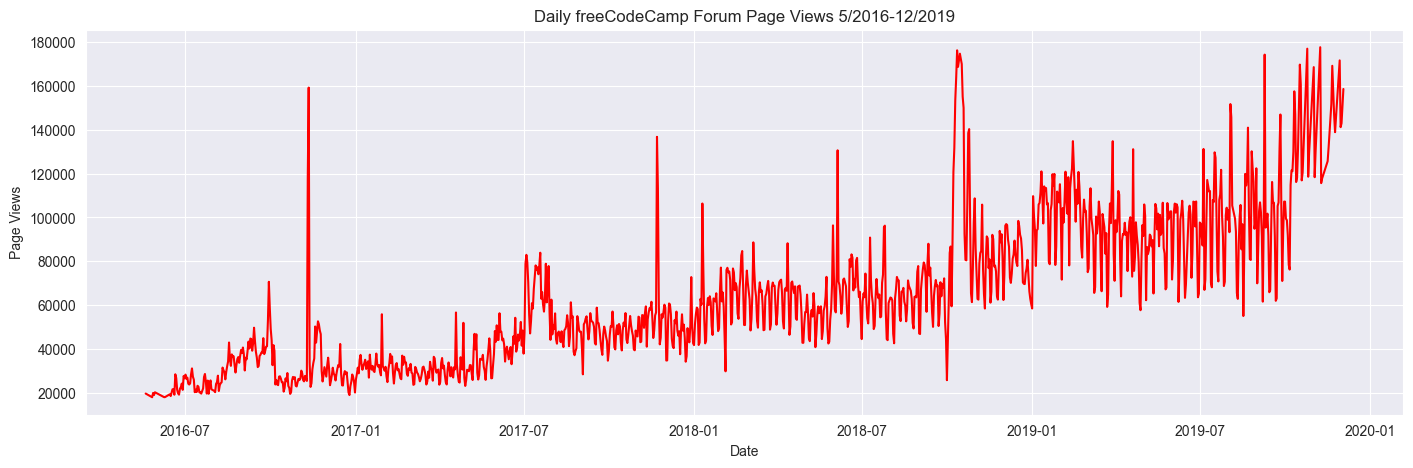

In [8]:
sns.set_style("darkgrid")
fig = sns.lineplot(x = "date", y = "value", data= df, color = "red", figure = plt.figure(figsize=(17,5)))
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.plot()

## Bar plot

I will create a bar plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

- i will start by copying df into df_bar and adding columns year and month

In [10]:
df_bar = df.copy()

In [11]:
df_bar["year"] = df_bar.index.year

In [12]:
df_bar["month"] = df_bar.index.month

- i will then clean the month column so that it shows the month properly

In [13]:
df_bar.reset_index()
ms = {1 :"january",2: "february", 3:"march",4:"april",5:"may", 6:"june",7:"july", 8:"augst",9: "september" ,10:"october",11:"november", 12:"december"}
for m in df_bar.month:
    if m in ms:
        df_bar.loc[df_bar.month == m, "month"] = ms[m]
    

- I will finally proceed to draw the bar plot from df_bar data frame

Text(0, 0.5, 'Average Page Views')

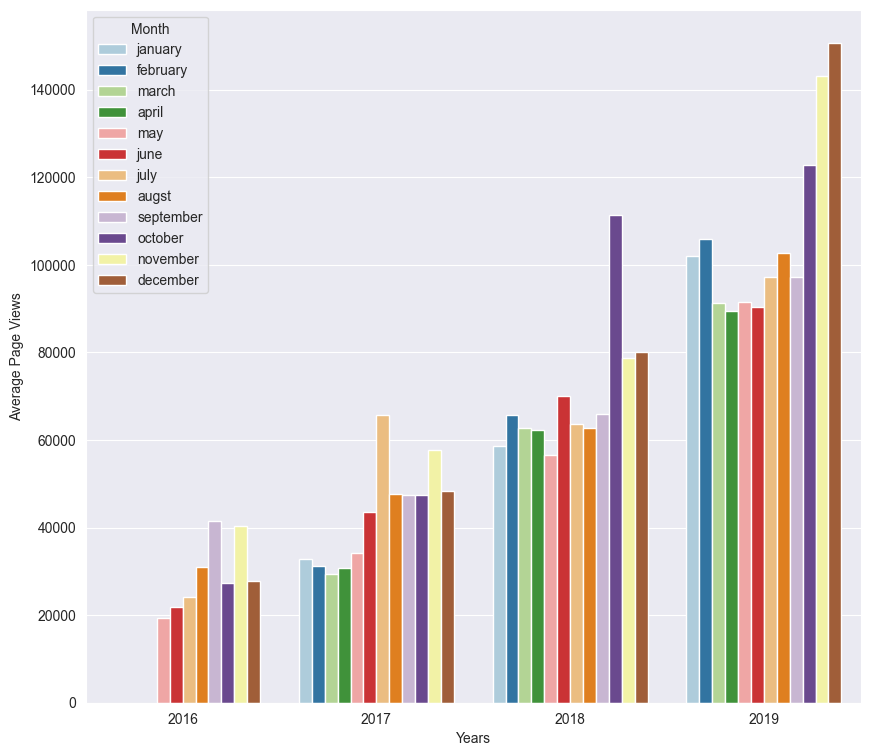

In [15]:
sns.set_style("darkgrid")
sns.barplot(x="year", y="value", data = df_bar, hue = "month", errorbar=('ci', False),
            hue_order = ["january", "february", "march","april","may", "june","july", "augst", "september" ,"october","november","december"],
           figure = plt.figure(figsize=(10,9)), palette = "Paired" )
plt.legend(loc='upper left', title="Month")
plt.xlabel("Years")
plt.ylabel("Average Page Views")

## Box plot

I will Create a box plot that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [17]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

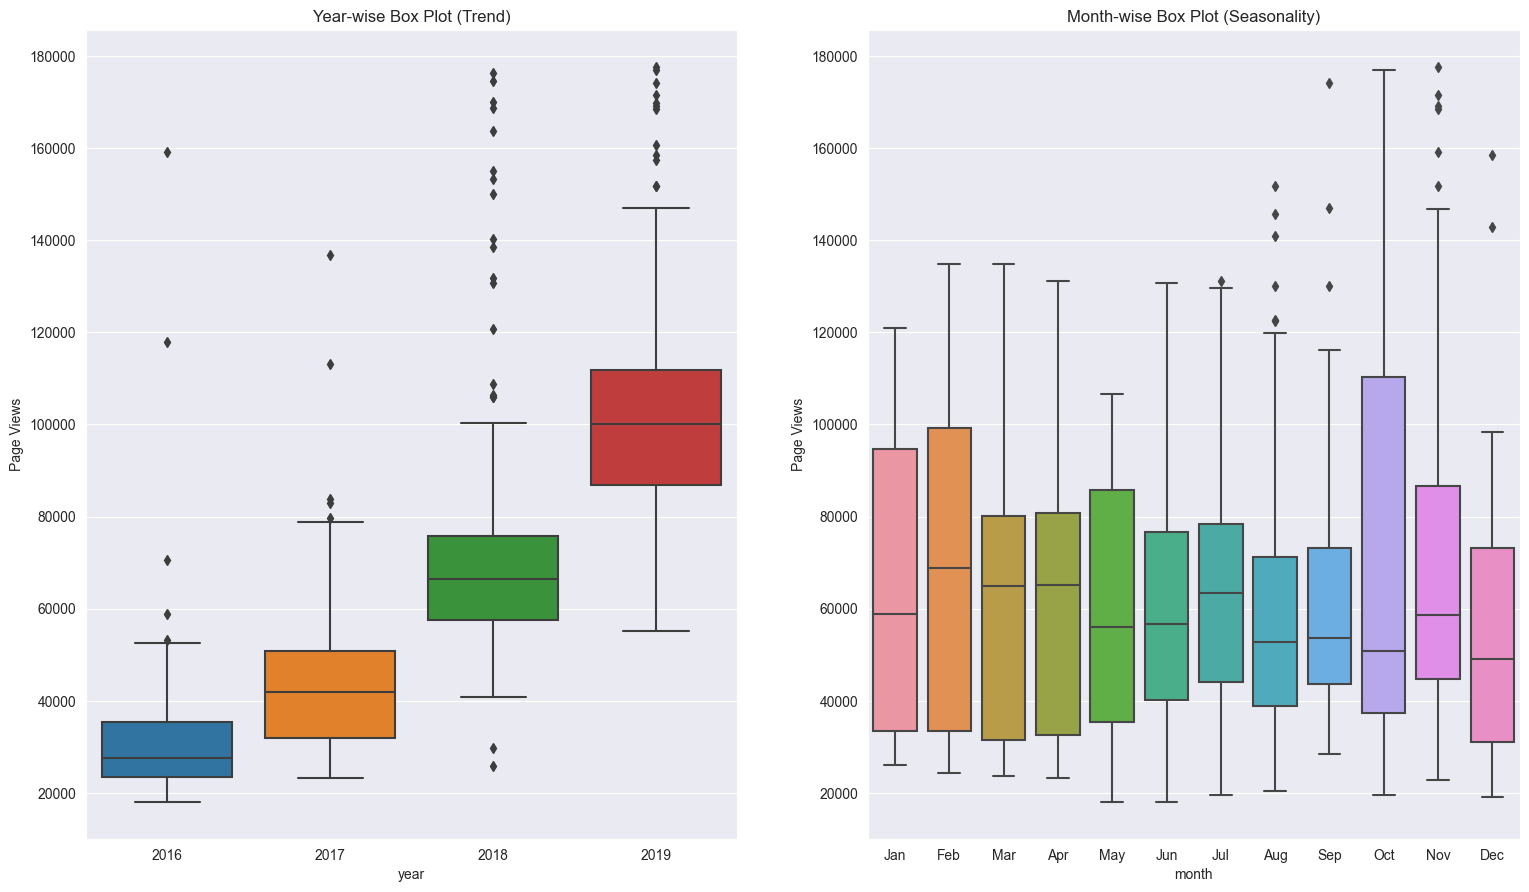

In [18]:
sns.set_style("darkgrid")
fig, axs = plt.subplots(ncols=2)
ax1 = sns.boxplot(x = "year", y= "value", data = df_box,ax=axs[0],)
ax1.set_title("Year-wise Box Plot (Trend)")
ax1.set_ylabel("Page Views")
ax2 = sns.boxplot(x = "month", y= "value", data = df_box, order = ["Jan", "Feb", "Mar","Apr","May", "Jun","Jul", "Aug", "Sep" ,"Oct","Nov","Dec"],ax=axs[1] )
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_ylabel("Page Views")
fig.set_size_inches(18.5, 10.5)
plt.show()